<a href="https://colab.research.google.com/github/sudhav2024/Machine-Learning/blob/main/ex8a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Model Evaluation ===
Accuracy  : 0.944
Precision : 0.956
Recall    : 0.956
F1-score  : 0.956
ROC AUC   : 0.985

Confusion Matrix:
[[49  4]
 [ 4 86]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.92      0.92      0.92        53
      benign       0.96      0.96      0.96        90

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



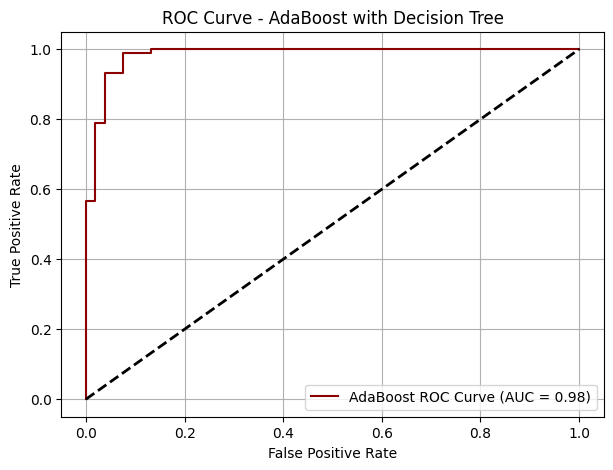

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

weak_learner = DecisionTreeClassifier(max_depth=1, random_state=0)
ada_boost = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=50,
    learning_rate=1.0,
    random_state=0
)

ada_boost.fit(X_train, y_train)

y_pred = ada_boost.predict(X_test)
y_proba = ada_boost.predict_proba(X_test)[:, 1]

print("=== Model Evaluation ===")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision : {precision_score(y_test, y_pred):.3f}")
print(f"Recall    : {recall_score(y_test, y_pred):.3f}")
print(f"F1-score  : {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC   : {roc_auc_score(y_test, y_proba):.3f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AdaBoost ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})', color='darkred')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost with Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()